In [1]:
from scipy import stats
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### SEM - stardard error of the mean
#### desvio padrão da média
#### não confunda $\sigma$ (SD), SSD e SEM

  - <font size="4">$\sigma$</font> ou SD - é o desvio padrão populacional
  - SSD - Sample SD - desvio padrão amostral (o que normalmente temos ao colher dados de um experimento)
  - SEM - O quanto estamos certos da média:
    - se n = 1 SEM == SSD
    - de acordo com que n cresce SEM descresce, diminuindo a incerteza sobre a média
    - se n tende a infinito, SEM tende a zero - certeza quase absoluta sobre a media

<font size="5">$SEM = \frac{SSD}{\sqrt{n}}$</font>

### Vamos plotar a diferença entre as distribuições de acordo com Gosset (distribuição t)

In [2]:
MUs = [1, 3]
SSDs = [0.3, 0.8]
N = 8

samp1 = np.random.normal(MUs[0], SSDs[0], N)
samp2 = np.random.normal(MUs[1], SSDs[1], N)

df = pd.DataFrame([samp1, samp2]).T
df.columns=['dist1', 'dist2']

# stack das duas distribuições
df1 = pd.DataFrame({'vals': df['dist1'], 'group': 'one'})
df2 = pd.DataFrame({'vals': df['dist2'], 'group': 'two'})
df2 = pd.concat([df1,df2])
df2.tail(3)

,vals,group
5,4.332011,two
6,4.747009,two
7,3.989911,two


In [3]:
df.head(3)

,dist1,dist2
0,1.365208,2.580011
1,1.058793,3.439442
2,1.101990,4.408044


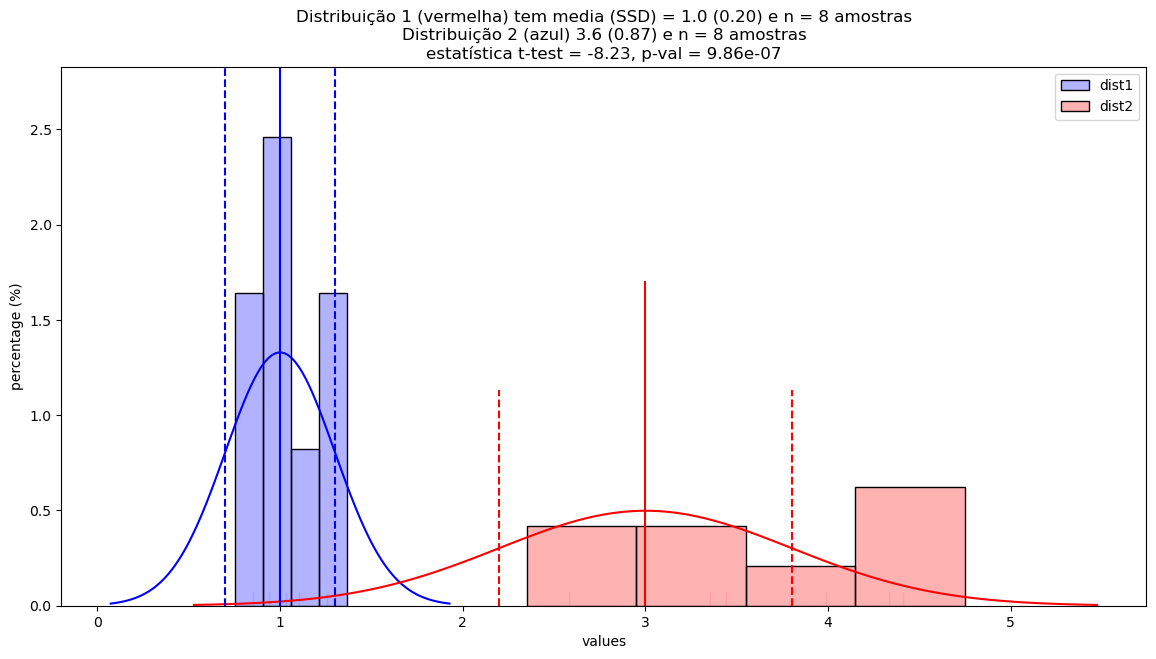

In [4]:
colors = ['blue', 'red']
fig, ax = plt.subplots(figsize=(14, 7))

for i in range(2):
    label = 'dist%d'%(i+1)
    y = df[label]
    ax = sns.histplot(y, stat='density', color=colors[i], alpha=0.3, label=label, ax=ax)
    sns.rugplot(y, color=colors[i], alpha=0.1, ax=ax)

    # Criando o eixo x        
    seqx = np.linspace(stats.norm.ppf(0.001, MUs[i], SSDs[i]), stats.norm.ppf(0.999, MUs[i], SSDs[i]), 100)

    # fiting da curva teorica
    normal_pdf = stats.norm.pdf(seqx, MUs[i], SSDs[i])
    sns.lineplot(x=seqx, y=normal_pdf, color=colors[i])

mu1 = df.dist1.mean()
ssd1 = df.dist1.std()

mu2 = df.dist2.mean()
ssd2 = df.dist2.std()

i=0
ax.axvline(x=MUs[0], ymin=0, ymax=1.4, color=colors[i])
ax.axvline(x=MUs[0]+SSDs[0], ymin=0, ymax=1.0, color=colors[i], linestyle='--')
ax.axvline(x=MUs[0]-SSDs[0], ymin=0, ymax=1.0, color=colors[i], linestyle='--')

i=1
ax.axvline(x=MUs[1], ymin=0, ymax=.6, color=colors[i])
ax.axvline(x=MUs[1]+SSDs[1], ymin=0, ymax=.4, color=colors[i], linestyle='--')
ax.axvline(x=MUs[1]-SSDs[1], ymin=0, ymax=.4, color=colors[i], linestyle='--')

head_width = 0.05

# nsamp = N*sqrt(SSDs[0]**2/n**2 + SSDs[1]**2/n**2)
SSD_pool = np.sqrt(SSDs[0]**2 + SSDs[1]**2)
diff = MUs[1]-MUs[0]

EffSize = diff / SSD_pool

sta, pval = stats.ttest_ind(df.dist1, df.dist2)
text_stat = "estatística t-test = %.2f, p-val = %.2e"%(sta, pval)
    
ax.set_xlabel("values")
ax.set_ylabel("percentage (%)")
     
title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, ssd1, N)
title += "\nDistribuição 2 (azul) %.1f (%.2f) e n = %d amostras"%(mu2, ssd2, N)
title += '\n' + text_stat
ax.set_title(title);

### A distribuição das diferenças - N pequeno - distribuição t

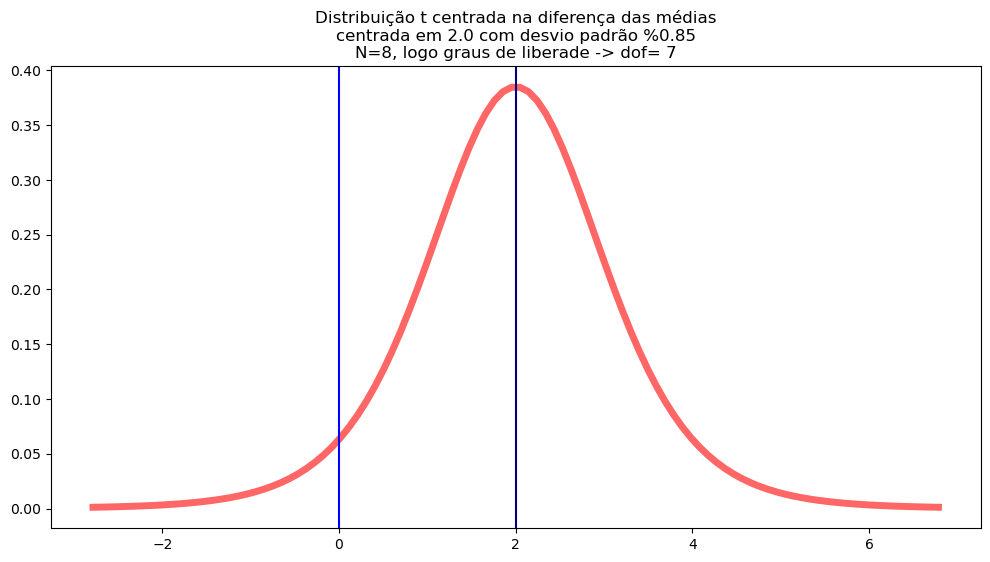

In [5]:
# dof = degree of freedom = graus de liberade
dof = N-1

seqx = np.linspace(stats.t.ppf(0.001, dof), stats.t.ppf(0.999, dof), 100)

diff = MUs[1] - MUs[0]
ssd_pool = np.sqrt(SSDs[0]**2 + SSDs[1]**2)

# pdf da distribuição t -> seqx e graus de liberdade!
ys = stats.t.pdf(seqx, dof)
xs = seqx + diff

title = 'Distribuição t centrada na diferença das médias'
title += f'\ncentrada em {diff:.1f} com desvio padrão %{ssd_pool:.2f}'
title += f'\nN={N}, logo graus de liberade -> dof= {dof}'

plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'r-', lw=5, alpha=0.6, label='t pdf')
plt.axvline(x=0, ymin=0, ymax=1, color='blue');
plt.axvline(x=diff, ymin=0, ymax=1, color='navy');
plt.title(title);

### Função Fi ($\Phi$)

alpha 0.05 --> área a porcentagem para uma área de 95% --> 2*SSD  
função cumulativa = Fi(porcentagem de área)

### Intervalo de confiança (confidence interval CI)

  - O intervalo de confiança:
    - não só depende do SSD, n --> SEM
    - depende da confiança que você impõe: 90%, 95%, 99%
    - quando escolha alpha = 0.05 --> 1-0.05 = 95%
  

<font size="5">$CI = [mean - \Phi(alpha) * \frac{SSD}{\sqrt{n}}, mean + \Phi(1-alpha) * \frac{SSD}{\sqrt{n}}]$</font>

### SEM

<font size="5">$SEM = \frac{SSD}{\sqrt{n}}$</font>


<font size="5">$\gamma_{inf} = \Phi(alpha)$</font>  


<font size="5">$\gamma_{sup} = \Phi(1-alpha)$</font>  



### Intervalo de confiança (confidence interval CI)

<font size="5">$CI = [mean - \gamma_{inf} * SEM, mean + \gamma_{sup} * SEM]$</font>

### Se distribuição normal
  - n >> 10 , n = 30 ou mais

In [6]:
alpha = 0.05/2
# intervalo de confiança - direita e a esquerda da média --> bi-caudal

fi_inf = stats.norm.ppf(alpha, 0, 1)
fi_sup = stats.norm.ppf(1-alpha, 0, 1)

fi_inf, fi_sup

(np.float64(-1.9599639845400545), np.float64(1.959963984540054))

### Se distribuição t-student

In [7]:
alpha = 0.05/2
dof = N-1

fi_inf = stats.t.ppf( alpha, dof)
fi_sup = stats.t.ppf( (1-alpha), dof)

N, dof, fi_inf, fi_sup

(8, 7, np.float64(-2.3646242515927844), np.float64(2.3646242515927844))

In [8]:
def calc_fi(N=None, is_normal=True, alpha=.05):
    
    alpha /= 2
    if is_normal:
        fi_inf = stats.norm.ppf(alpha, 0, 1)
        fi_sup = stats.norm.ppf(1-alpha, 0, 1)
    else:
        dof = N-1

        fi_inf = stats.t.ppf( alpha, dof)
        fi_sup = stats.t.ppf( (1-alpha), dof)
        
    return np.array( [fi_inf, fi_sup])

def calc_ttest(vals1, vals2):
    
    sta, pval = stats.ttest_ind(vals1, vals2)
    text_stat = "estatística t-test = %.2f, p-val = %.2e"%(sta, pval)

    if pval >= 0.05:
        text_stat += "\nnão se refuta H0: distribuições estatisticamente similares"
    else:
        text_stat += "\nadota-se a Ha: distribuições estatisticamente diferentes"
    
    return text_stat, sta, pval


In [9]:
fis = calc_fi(N=N, is_normal=False)
fis

array([-2.36462425,  2.36462425])

In [10]:
SEM = ssd_pool/np.sqrt(N)

media_dist = diff

CI = media_dist + (fis * SEM) 
CI

diff, ssd_pool, SEM, CI

(2,
 np.float64(0.8544003745317532),
 np.float64(0.3020761493398643),
 array([1.28570341, 2.71429659]))

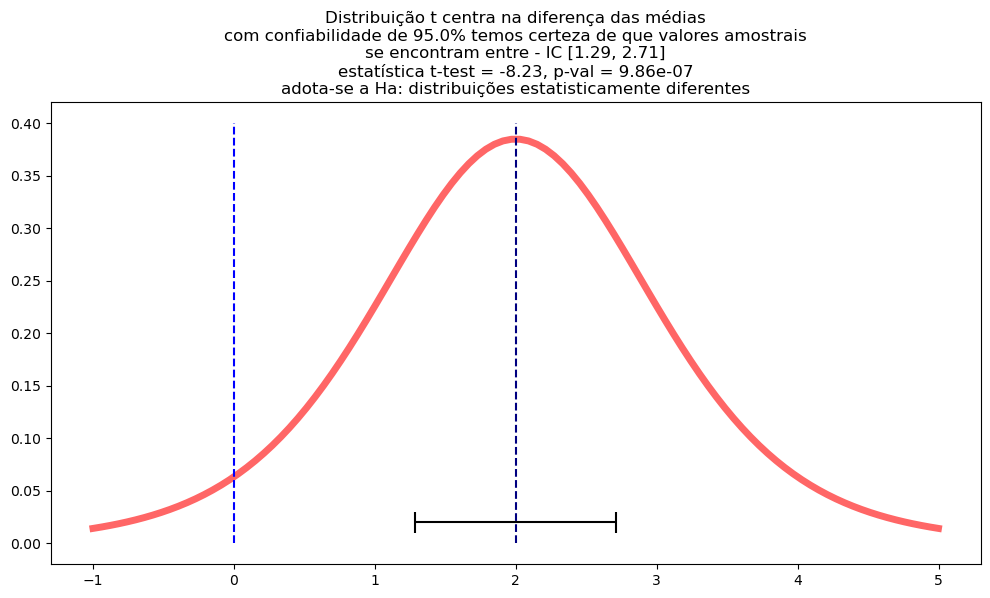

In [11]:
dof = N-1
alpha = 0.05
x = np.linspace(stats.t.ppf(0.01, dof), stats.t.ppf(0.99, dof), 100)

diff = MUs[1] - MUs[0]
ssd_pool = np.sqrt(SSDs[0]**2 + SSDs[1]**2)

fis = calc_fi(N=N, alpha=alpha, is_normal=False)
SEM = ssd_pool/np.sqrt(N)
CI = (fis * SEM) + diff

ys = stats.t.pdf(x, dof)
xs = x + diff

title = 'Distribuição t centra na diferença das médias'

plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'r-', lw=5, alpha=0.6, label='t pdf')

plt.vlines( x=0, ymin=0, ymax=.4, color='blue', linestyle='--')
plt.vlines( x=diff, ymin=0, ymax=.4, color='navy', linestyle='--')

y = .02; del_y = 0.01
plt.hlines(y, CI[0], CI[1], color = 'black', linestyle='-')
plt.vlines(x=CI[0], ymin=y-del_y, ymax=y+del_y, color='black', linestyle='-')
plt.vlines(x=CI[1], ymin=y-del_y, ymax=y+del_y, color='black', linestyle='-')

title += '\ncom confiabilidade de %.1f%% temos certeza de que valores amostrais'%((1-alpha)*100)
title += '\nse encontram entre - IC [%.2f, %.2f]\n'%(CI[0], CI[1])

text_stat, sta, pval = calc_ttest(samp1, samp2)
title += text_stat

plt.title(title);

### O que é o intervalo de confiança?
  - É tua barra de erro!
  - Logo, sempre que apresentar os dados, não se esqueça de colocar:
    - a porcentagem de confiança = (1-alpha) * 100% --> neste caso 95%
    - o N amostral
    - o intervalo de confiança
    - p-value da estatística t
    - o Tamanho do Efeito, e a diferença entre as médias
    
Se depois de tudo que calcular a diferença for 2 pMol, e 2 pMol não são suficiente para alterar a resposta celular, então a estatística pode ser significativa, mas a biologia molecular descarta os resultados.    